In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats

In [2]:
"""Load dataset in a DataFrame"""
df = pd.read_csv(r'/Users/aaronlin/Desktop/MLproject/ML2022/data/dota2TrainingNamed.csv')
df

,winning_team,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# check missing data
df.isnull().values.any()

False

In [4]:
# delete cluster_id
df.drop(['cluster_id'], axis=1, inplace=True)

<AxesSubplot:xlabel='game_mode', ylabel='count'>

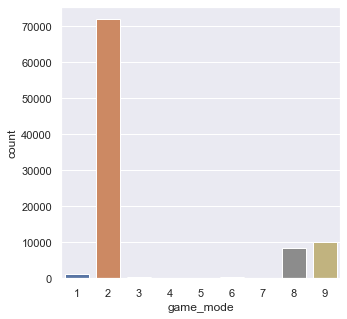

In [5]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data=df, x='game_mode')

<AxesSubplot:xlabel='game_type', ylabel='count'>

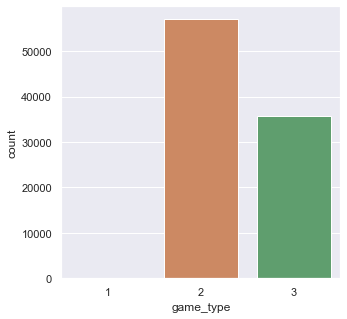

In [6]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data=df, x='game_type')

In [7]:
#group1 winning team: 1; gropu2 winning team: -1
group1 = df[df["winning_team"] == 1]
group2 = df[df["winning_team"] == -1]

In [8]:
group1

,winning_team,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
1,1,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,0
5,1,2,3,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
6,1,8,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92641,1,9,2,0,0,0,0,0,0,0,...,1,1,-1,0,0,0,0,0,0,0
92642,1,2,3,-1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92644,1,2,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,2,2,0,0,0,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
group2

,winning_team,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,-1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,8,3,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,2,3,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,-1,2,2,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92638,-1,2,2,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92643,-1,2,3,0,-1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
92645,-1,2,3,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,2,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

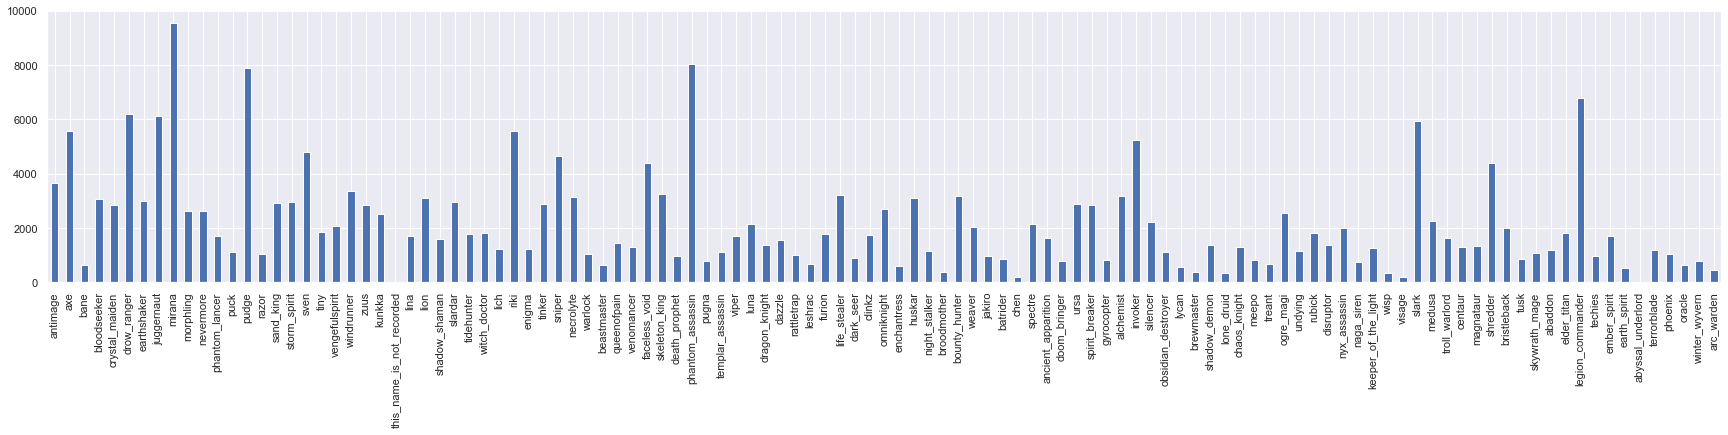

In [10]:
# group1 winning team heroes 
count_group1_winning = group1[group1 == 1].sum(axis=0)[3:]
count_group1_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

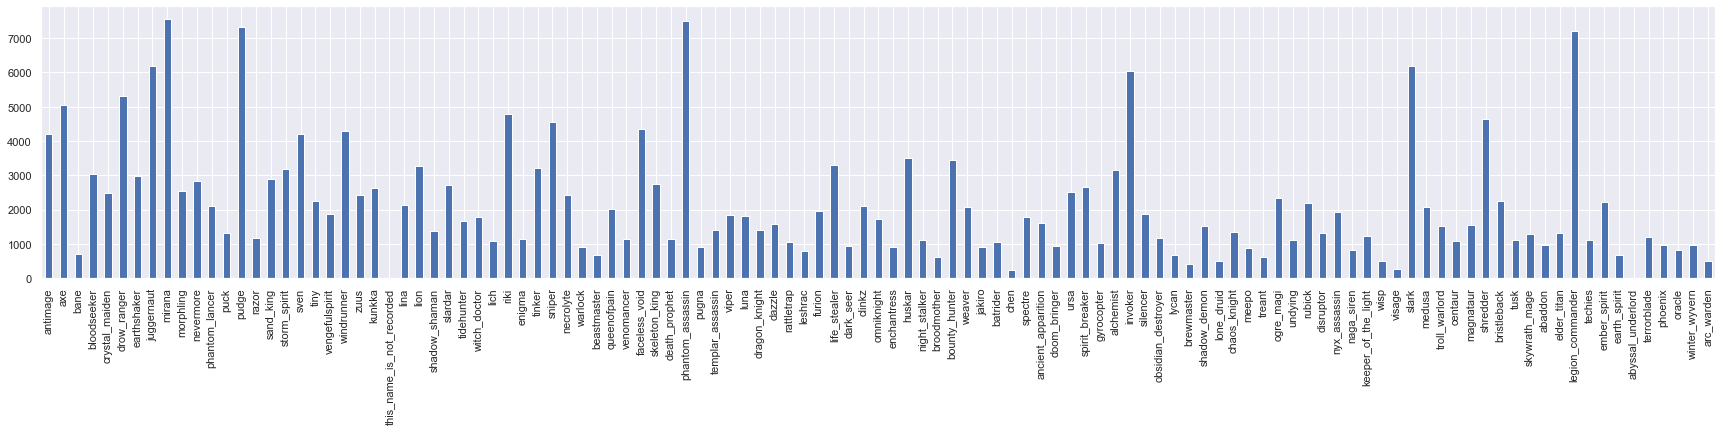

In [11]:
# group1 losing team heroes
count_group1_losing = group1[group1 == -1].sum(axis=0)[3:]
count_group1_losing.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

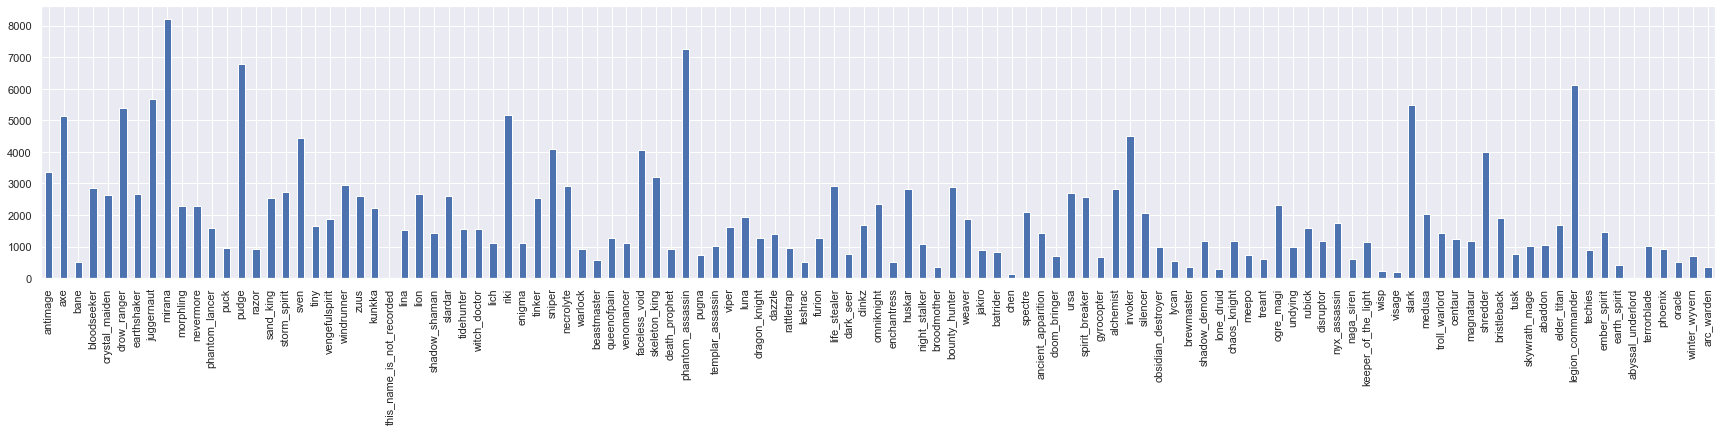

In [12]:
# group2 winning team heroes
count_group2_winning = group2[group2 == -1].sum(axis=0)[3:]
count_group2_winning.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

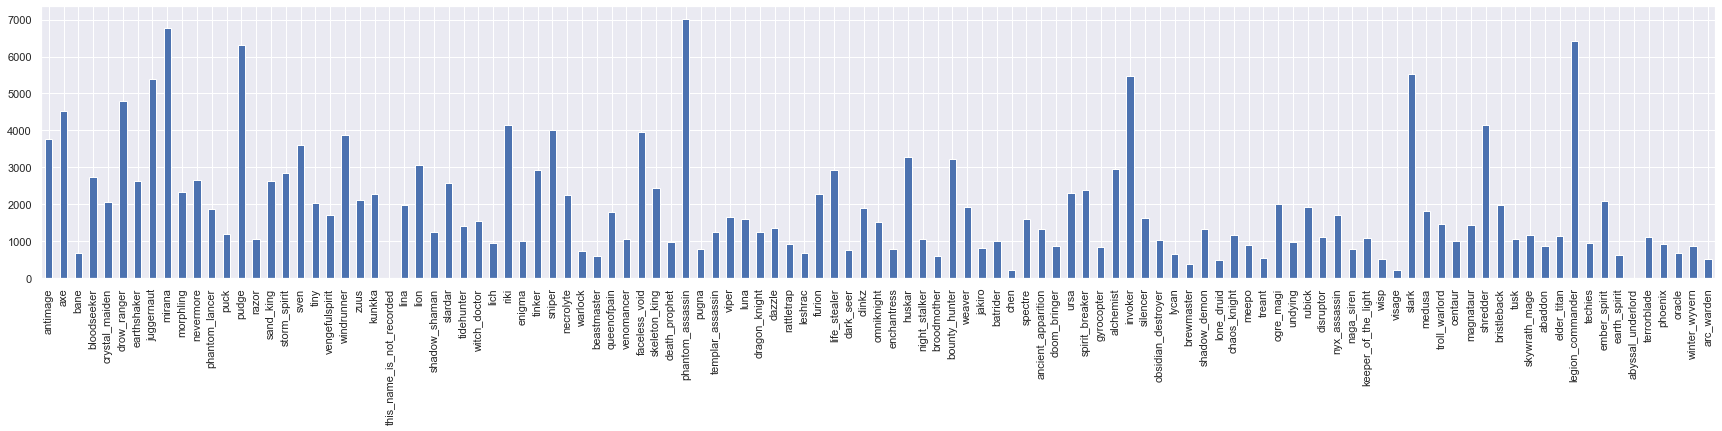

In [13]:
# group2 losing team heroes
count_group2_losing = group2[group2 == 1].sum(axis=0)[3:]
count_group2_losing.plot.bar(figsize=(30,5))

<AxesSubplot:>

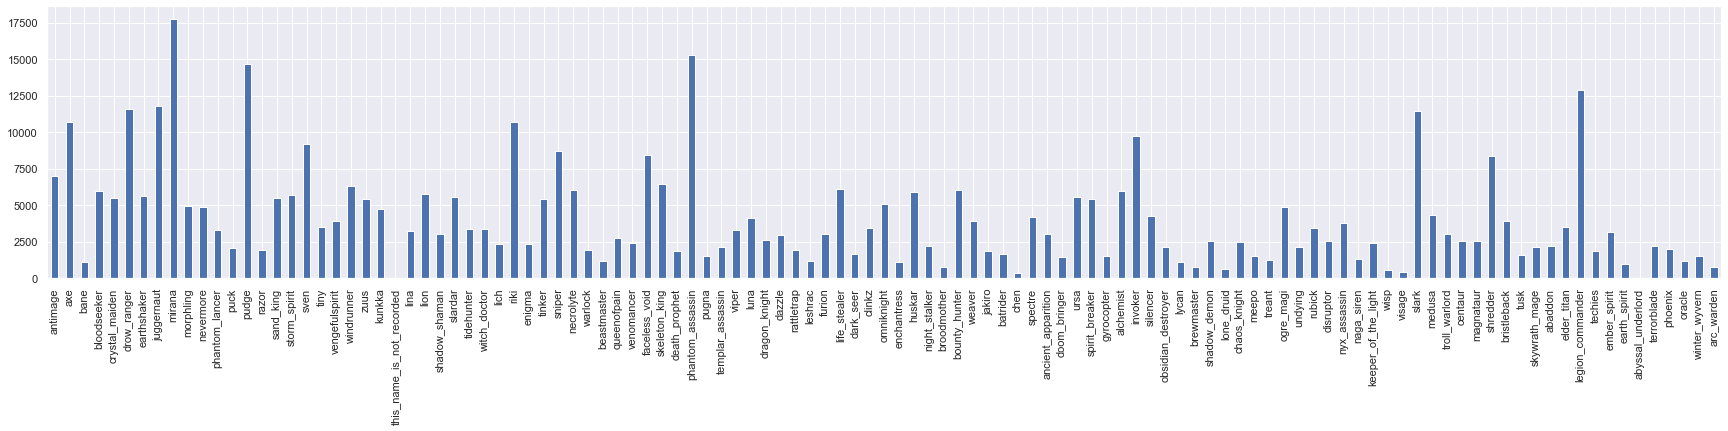

In [14]:
# count all winning 
count_all_winning = count_group1_winning + count_group2_winning.abs()
count_all_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

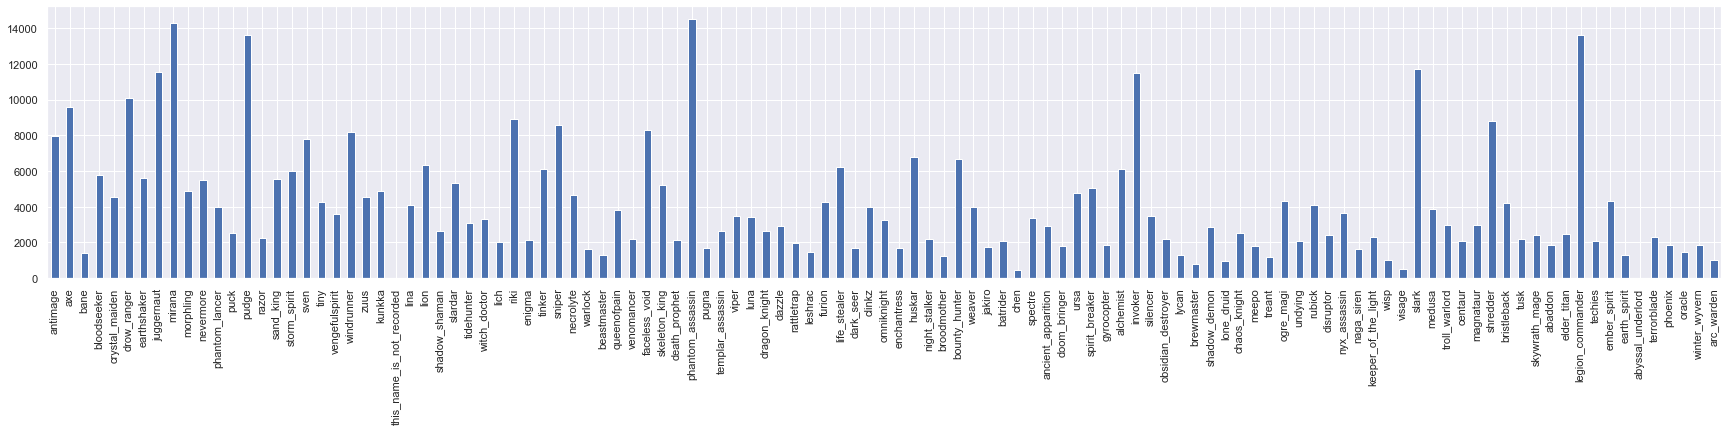

In [15]:
# count all losing
count_all_losing = count_group1_losing.abs() + count_group2_losing
count_all_losing.plot.bar(figsize=(30,5))

In [16]:
#top 10 used heroes between winning and losing (among all groups)
print('winning team heroes counts')
print(count_all_winning.nlargest(n=10))
print('\n')
print('losing team heroes counts')
print(count_all_losing.nlargest(n=10))

winning team heroes counts
mirana              17729.0
phantom_assassin    15302.0
pudge               14640.0
legion_commander    12919.0
juggernaut          11766.0
drow_ranger         11604.0
slark               11422.0
riki                10730.0
axe                 10680.0
invoker              9755.0
dtype: float64


losing team heroes counts
phantom_assassin    14500.0
mirana              14319.0
pudge               13645.0
legion_commander    13602.0
slark               11703.0
juggernaut          11561.0
invoker             11507.0
drow_ranger         10096.0
axe                  9584.0
riki                 8940.0
dtype: float64


In [17]:
#group1 heroes
group1_heroes = group1.iloc[:,3:]
group1_heroes

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,morphling,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
1,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92641,0,0,0,0,0,0,0,0,0,0,...,1,1,-1,0,0,0,0,0,0,0
92642,-1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92644,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,0,0,0,0,-1,0,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
# group2 heroes
group2_heroes = group2.iloc[:,3:]
group2_heroes

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,morphling,...,legion_commander,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92638,1,0,0,-1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
92643,0,-1,0,0,0,1,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
92645,1,0,0,-1,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
92648,0,0,0,0,0,1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Get winning heroes combination from group1
gp1_winning_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp1_winning_heroes.append(combination)

print(len(gp1_winning_heroes))

48782


In [20]:
# Count winning combinations in group1
counts_gp1Combination_win = pd.Series(gp1_winning_heroes).value_counts()
print(counts_gp1Combination_win.nlargest(n=10))

[mirana, riki, ogre_magi, nyx_assassin, legion_commander]         3
[vengefulspirit, beastmaster, luna, lycan, abaddon]               3
[juggernaut, pudge, riki, faceless_void, invoker]                 3
[mirana, morphling, sand_king, lion, spirit_breaker]              3
[axe, juggernaut, pudge, weaver, silencer]                        2
[earthshaker, windrunner, phantom_assassin, invoker, shredder]    2
[axe, drow_ranger, morphling, windrunner, venomancer]             2
[mirana, pudge, sven, necrolyte, invoker]                         2
[axe, juggernaut, mirana, queenofpain, slark]                     2
[axe, juggernaut, vengefulspirit, faceless_void, elder_titan]     2
dtype: int64


In [21]:
# Get winning heroes combination from group2
gp2_winning_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp2_winning_heroes.append(combination)

print(len(gp2_winning_heroes))

43868


In [22]:
# Count the winning combinations in group2
counts_gp2Combination_win = pd.Series(gp2_winning_heroes).value_counts()
print(counts_gp2Combination_win.nlargest(n=10))

[vengefulspirit, beastmaster, luna, lycan, abaddon]             7
[axe, mirana, sven, lion, invoker]                              3
[bloodseeker, juggernaut, riki, sniper, phantom_assassin]       2
[axe, riki, tinker, phantom_assassin, spirit_breaker]           2
[pudge, faceless_void, invoker, shadow_demon, terrorblade]      2
[mirana, pudge, lion, ursa, legion_commander]                   2
[drow_ranger, pudge, sven, faceless_void, luna]                 2
[pudge, riki, slark, shredder, legion_commander]                2
[mirana, nevermore, pudge, vengefulspirit, phantom_assassin]    2
[pudge, vengefulspirit, riki, slark, legion_commander]          2
dtype: int64


In [23]:
# Get losing heroes combination from group1
gp1_losing_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp1_losing_heroes.append(combination)

print(len(gp1_losing_heroes))

In [ ]:
# Count losing combinations in group1
counts_gp1Combination_lose = pd.Series(gp1_losing_heroes).value_counts()
print(counts_gp1Combination_lose.nlargest(n=10))

In [ ]:
# Get losing heroes combination from group2
gp2_losing_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp2_losing_heroes.append(combination)

print(len(gp2_losing_heroes))

In [ ]:
# Count losing combinations in group2
counts_gp2Combination_lose = pd.Series(gp2_losing_heroes).value_counts()
print(counts_gp2Combination_lose.nlargest(n=10))

In [ ]:
# Sum winning combinations from group1 and group2 
combine_group_winning = gp1_winning_heroes + gp2_winning_heroes
counts_combine_group_winning = pd.Series(combine_group_winning).value_counts()
print(counts_combine_group_winning.nlargest(n=10))

In [ ]:
# Sum losing combinations from group1 and group2
combine_group_losing = gp1_losing_heroes + gp2_losing_heroes
counts_combine_group_losing = pd.Series(combine_group_losing).value_counts()
print(counts_combine_group_losing.nlargest(n=10))